In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from scipy.stats import randint
import pickle
import cv2
import numpy as np
import csv

In [2]:
# Load the dataset
data = pd.read_csv("leaf_features.csv")

In [3]:
data = data.drop(columns=['Image Name'])

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[["Leaf Count", "Leaf Area Covered"]], data["Weight"], test_size=0.2, random_state=42)

In [5]:
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [6]:
# Create a KNN regressor
knn_regressor = KNeighborsRegressor()

In [7]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [8]:
# Get the best model and its hyperparameters
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

In [9]:
# Predict biomass on the test data using the best model
y_pred = best_knn.predict(X_test)

In [10]:
# # Create a KNN regressor with a specified number of neighbors (adjust as needed)
# n_neighbors = 5
# knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)

In [11]:
# # Fit the model on the training data
# knn_regressor.fit(X_train, y_train)

In [12]:
# # Save the trained model to a file
# filename = 'knn_model_new.pkl'
# pickle.dump(knn_regressor, open(filename, 'wb'))

In [13]:
# # Predict biomass on the test data
# y_pred = knn_regressor.predict(X_test)

In [14]:
# Compute R^2 score and mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [15]:
# Print the best hyperparameters, R^2 score, and mean squared error
print("Best Hyperparameters:", best_params)
print(f"R^2 Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error:{mse:.3f}")

Best Hyperparameters: {'n_neighbors': 9, 'weights': 'uniform'}
R^2 Score: 0.031
Mean Squared Error: 0.002
Mean Absolute Error:0.002


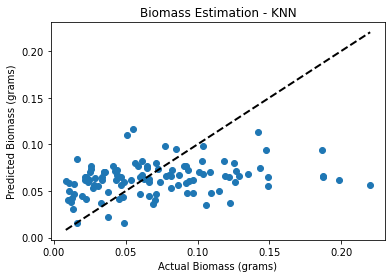

In [16]:
# Plot the actual biomass values and predicted biomass values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Biomass (grams)')
plt.ylabel('Predicted Biomass (grams)')
plt.title('Biomass Estimation - KNN')
plt.show()

In [ ]:
# Plot the actual biomass values and predicted biomass values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Biomass (grams)')
plt.ylabel('Predicted Biomass (grams)')
plt.show()